<a href="https://www.kaggle.com/code/mikedelong/price-and-volume-eda-with-lineplots?scriptVersionId=248560930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import pandas as pd
dirname = '/kaggle/input/global-stock-market-2008-present'
filenames = sorted([filename for filename in os.listdir(dirname) if os.path.isfile(os.path.join(dirname, filename))])
df = pd.concat([pd.read_csv(filepath_or_buffer=os.path.join(dirname, filename), parse_dates=['Date']) for filename in filenames])

In [2]:
df.shape

(44900, 8)

In [3]:
pd.concat(objs=[df.dtypes, df.isna().sum()], axis=1).T

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,object,datetime64[ns],float64,float64,float64,float64,float64,float64
1,0,0,0,0,0,0,0,0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Date', ylabel='Adj Close'>

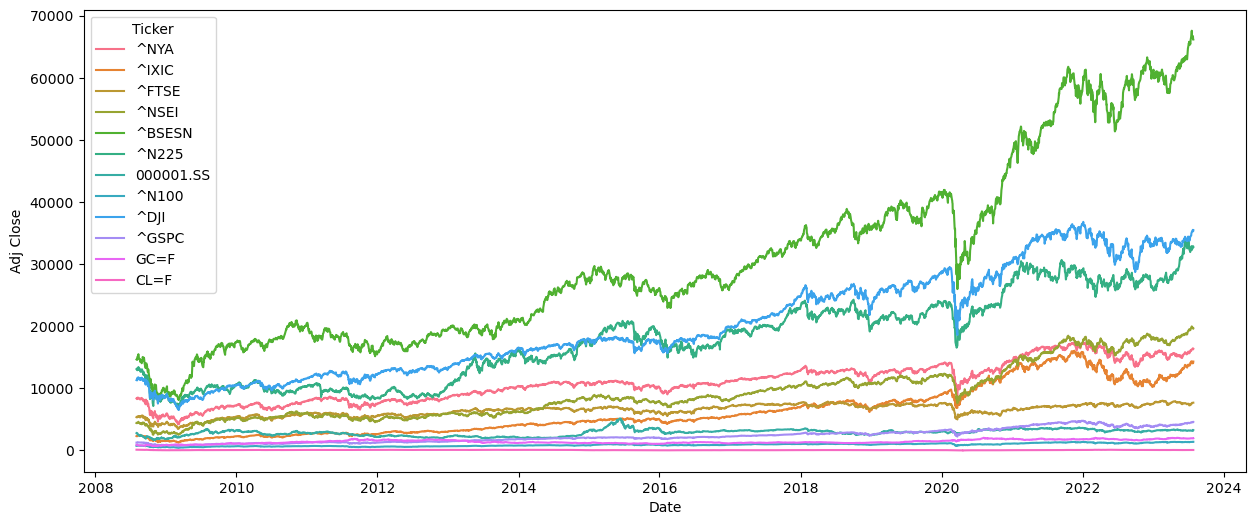

In [4]:
from matplotlib.pyplot import subplots
from seaborn import lineplot

figsize = (15, 6)
_, ax = subplots(figsize=figsize)
lineplot(ax=ax, data=df, x='Date', hue='Ticker', y='Adj Close', )

Let's look at the correlations.

<Axes: xlabel='Ticker', ylabel='Ticker'>

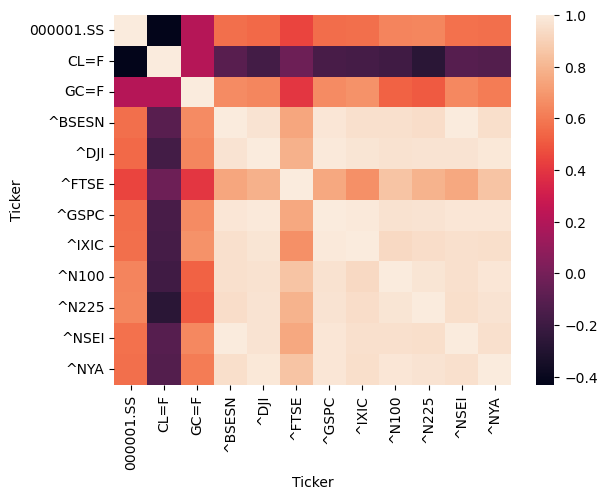

In [5]:
from seaborn import heatmap
heatmap(data=df[['Date', 'Ticker', 'Adj Close']].pivot(index='Date', columns=['Ticker'], values='Adj Close').corr())

I guess it isn't surprising that equities are highly correlated. Let's add a volume plot.

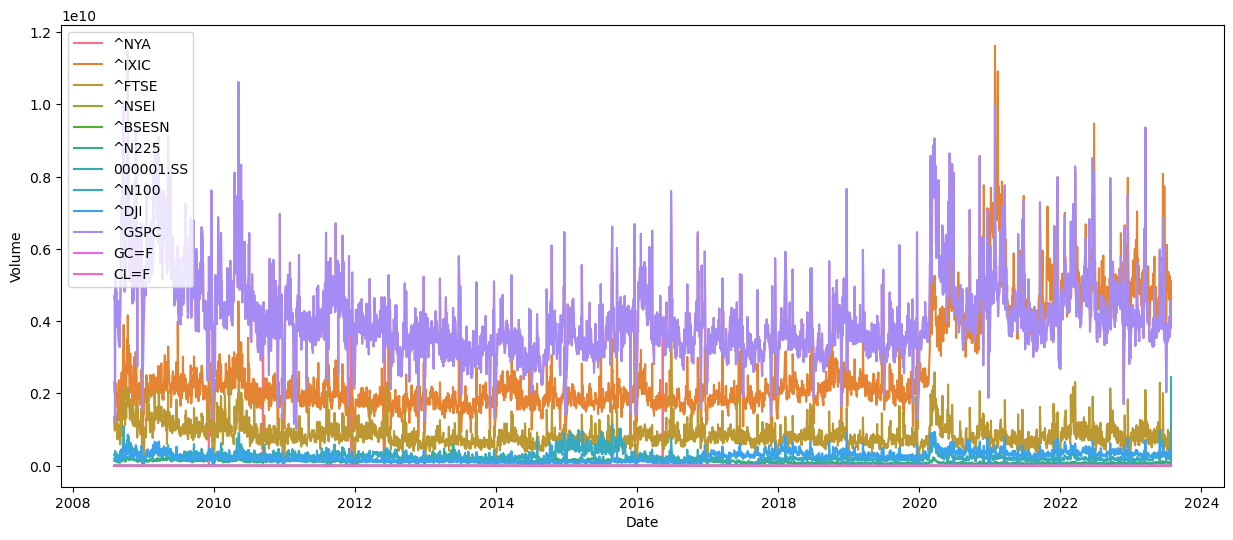

In [6]:
from matplotlib.pyplot import legend
_, ax = subplots(figsize=figsize)
lineplot(ax=ax, data=df, x='Date', hue='Ticker', y='Volume', )
legend(loc='upper left')

We'd be remiss if we didn't look at the volume correlations.

<Axes: xlabel='Ticker', ylabel='Ticker'>

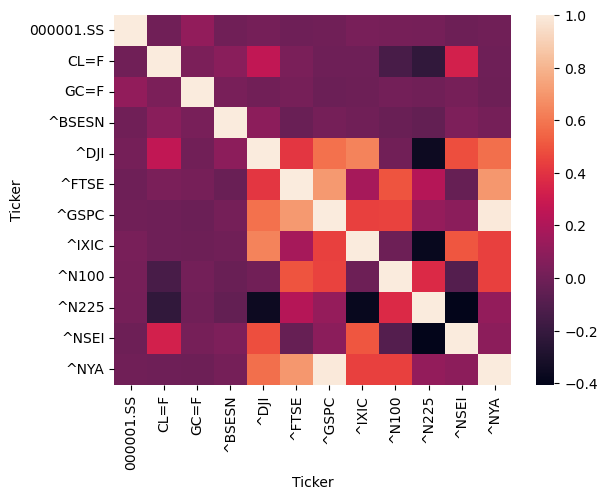

In [7]:
heatmap(data=df[['Date', 'Ticker', 'Volume']].pivot(index='Date', columns=['Ticker'], values='Volume').corr())

Monthly averaged volume may make trends easier to see.

<Axes: xlabel='Date', ylabel='Volume'>

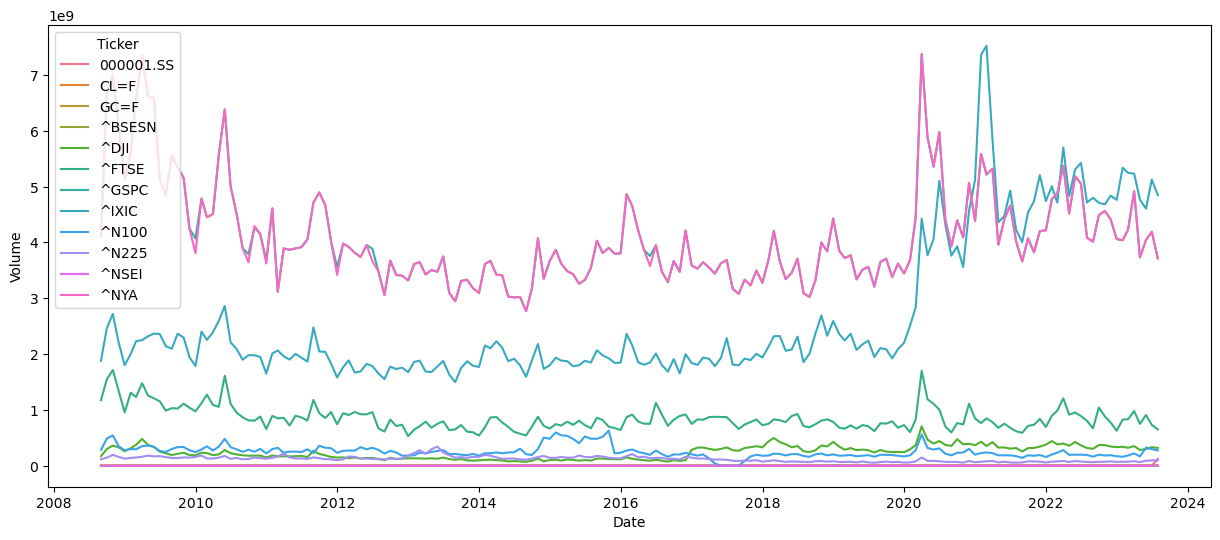

In [8]:
volume_df = df[['Date', 'Ticker', 'Volume']].pivot(index='Date', columns=['Ticker'], values='Volume')
volume_df.index = pd.to_datetime(volume_df.index)

_, ax = subplots(figsize=figsize)
lineplot(ax=ax, data=volume_df.resample('M').mean().reset_index().melt(id_vars=['Date'], var_name='Ticker',  value_name='Volume'),
         x='Date', y='Volume', hue='Ticker'   )

It really seems like one or maybe two of those indices have big jumps in volume in early 2020. 

Let's take a look at the log plot to see if we can see more that way.

<Axes: xlabel='Date', ylabel='Volume'>

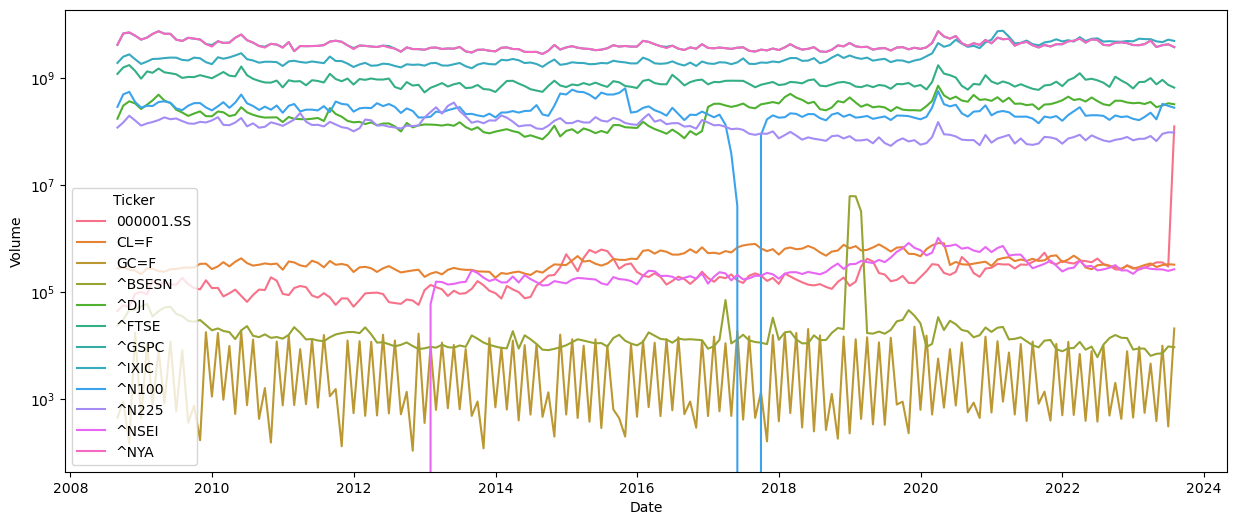

In [9]:
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, module='pandas')

_, ax = subplots(figsize=figsize)
ax.set_yscale('log')

lineplot(ax=ax, data=volume_df.resample('M').mean().reset_index().melt(id_vars=['Date'], var_name='Ticker',  value_name='Volume'),
         x='Date', y='Volume', hue='Ticker',    )

Our log plot looks kind of odd in a couple of places; we clearly have some missing data, and some of these volumes just look strange plotted on the same axes.